# Intrinsic persistent homology

In [1]:
#libraries math
import math
import scipy
import numpy  as np
import pandas as pd
from ripser        import Rips
from scipy.spatial import  distance_matrix

#libraries matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri    as tri 
from   mpl_toolkits.mplot3d import Axes3D 
from   matplotlib           import animation, rc

#libraries display
import sys
from IPython.display import HTML
from IPython.display import clear_output

#library with the generators of datasets
from utils import *

## The datasets

### Lemniscate

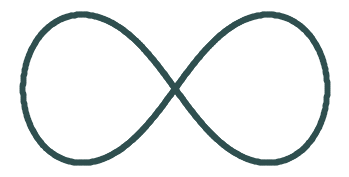

In [4]:
L_curve = generateLemniscate(N_signal = 2000, sd = 0)
plt.figure(figsize=(6,3))
plt.axis('off');
plt.scatter(L_curve[:,0], L_curve[:,1], s=20, alpha = 1, color = 'darkslategrey');

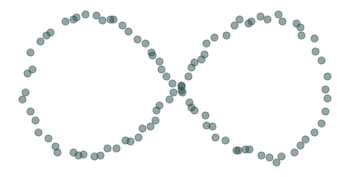

In [5]:
L = generateLemniscate(N_signal = 100, sd = 0.2)
plt.figure(figsize=(6,3))
plt.axis('off');
plt.scatter(L[:,0], L[:,1], s=50, alpha = 0.5, color = 'darkslategrey');

### Eyeglasses

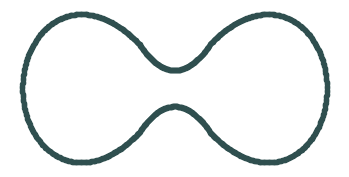

In [6]:
E_curve = generateEyeglasses(N_signal = 1000, l=0.5, sd = 0)
plt.figure(figsize=(6,3))
plt.axis('off');
plt.scatter(E_curve[:,0], E_curve[:,1], s=20, alpha = 1, color = 'darkslategrey');

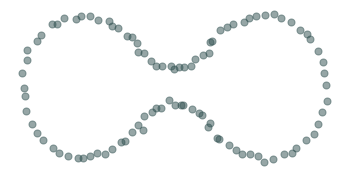

In [7]:
E = generateEyeglasses(N_signal = 100, l=0.5, sd = 0.15)
plt.figure(figsize=(6,3))
plt.axis('off');
plt.scatter(E[:,0], E[:,1], s=50, alpha = 0.5, color = 'darkslategrey');

### Trivial knot 

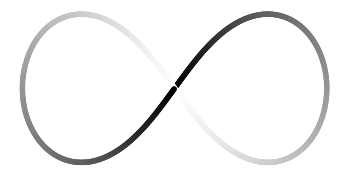

In [8]:
LL_curve = generateLemniscateLifted(N_signal = 1000, l=0.5, sd = 0)
plt.figure(figsize=(6,3))
plt.axis('off');
plt.scatter(LL_curve[:,0], LL_curve[:,1], s=20, alpha = 1, c = LL_curve[:,2], cmap = 'Greys');

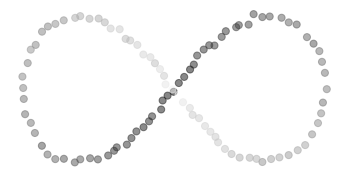

In [9]:
LL = generateLemniscateLifted(N_signal = 100, l=0.5, sd = 0.15)
plt.figure(figsize=(6,3))
plt.axis('off');
plt.scatter(LL[:,0], LL[:,1], s=50, alpha = 0.5, c = LL[:,2], cmap = 'binary');

## Persistence Diagrams

In [2]:
rips = Rips(maxdim = 1)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


### 1.Euclidean Distance

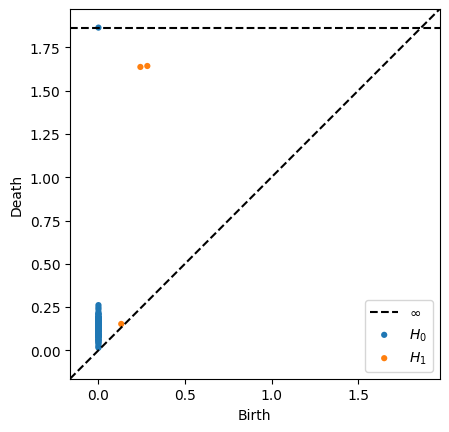

In [13]:
dgms = rips.fit_transform(L)
rips.plot(dgms);

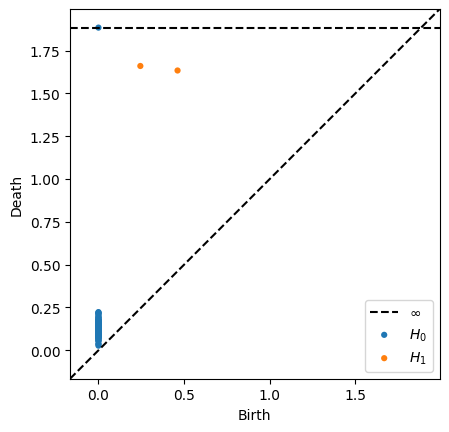

In [14]:
dgms = rips.fit_transform(E)
rips.plot(dgms);

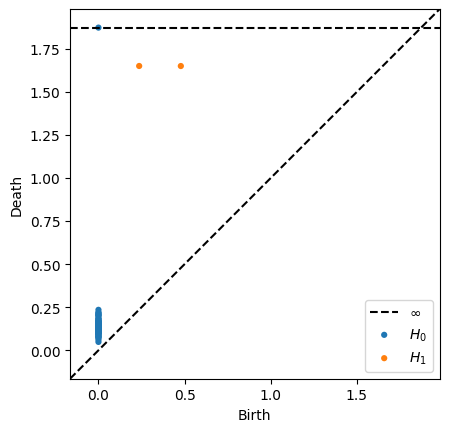

In [15]:
dgms = rips.fit_transform(LL)
rips.plot(dgms);

### 2.Geodesic distance

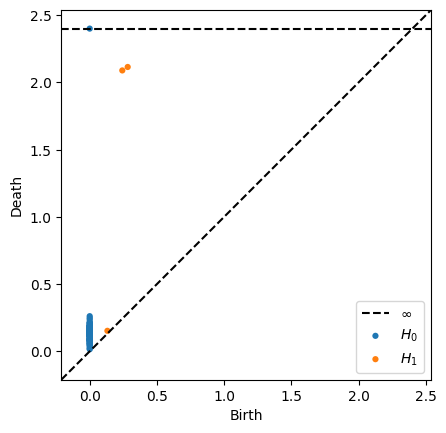

In [16]:
D = compute_eps_geodesic_distance(L, eps = 0.4)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

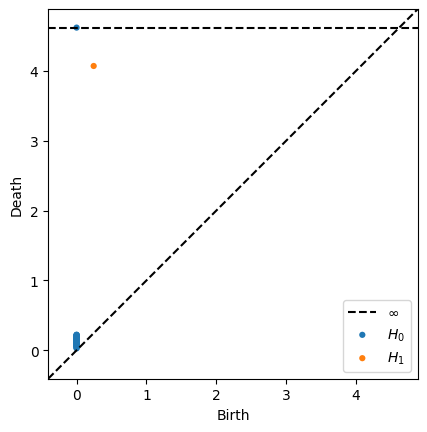

In [17]:
D = compute_eps_geodesic_distance(E, eps = 0.4)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

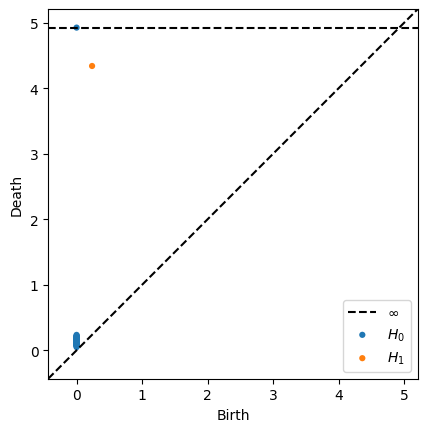

In [18]:
D = compute_eps_geodesic_distance(LL, eps = 0.4)
dgms = rips.fit_transform(D, distance_matrix=True)
rips.plot(dgms);

## Animation of the Vietoris-Rips filtration for the eyeglasses

In [130]:
def animationRips(i):
    clear_output(wait=True)
    print ('Iteration %i'%i+' over %i'%number_frames+'.')
    sys.stdout.flush()

    ax.clear()
    ax.axis('off')
    r = radii[i]
        
    #plot the points 
    for j in range(np.shape(X)[0]):
        point = plt.Circle((X[j,0], X[j,1]), .03, facecolor='darkslategrey', edgecolor = 'darkslateblue', alpha = 0.7)
        ax.add_artist(point)
    
    #plot edges 
    for j in range(np.shape(X)[0]):
        for k in range(j, np.shape(X)[0]):
            if distance[j,k]<2*r:
                plt.plot([X[j,0], X[k,0]], [X[j,1], X[k,1]], c = 'darkslategrey', alpha = 0.1)
    
    #plot triangles
    for j in range(np.shape(X)[0]):
        for k in range(j, np.shape(X)[0]):
            for t in range(k, np.shape(X)[0]):
                if (distance[j,k]<2*r)&(distance[j,t]<2*r)&(distance[k,t]<2*r):
                    triangle = plt.Polygon([X[j,:], X[k,:], X[t,:]], color='indianred', alpha = 0.05)
                    ax.add_artist(triangle)
        
    ax.set_xlim(-2.5,2.5)
    ax.set_ylim(-1.2,1.2)

In [131]:
'Video parameters'

FPS = 3                     #frames per second
DPI = 200                    #quality of the video
time = 10                     #duration of the video
number_frames = time*FPS     #number of frames

radii = np.linspace(0,1,number_frames)    #radii used in the filtration

In [ ]:
fig = plt.figure( figsize=(6,3) )       #define the figure
ax = fig.add_subplot(1, 1, 1)           #define the axis
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-1.2,1.2)
ax.axis('off')
fig.add_axes(ax)

Iteration 0 over 30.


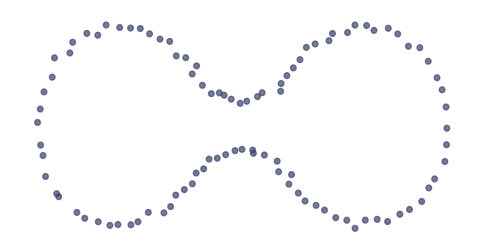

In [132]:
X=E
distance = distance_matrix(X,X)

'Generate the animation'

anim = animation.FuncAnimation(fig, animationRips,
                               frames=number_frames,
                               interval=350,
                               blit=False,
                               repeat=False)

' Display the animation in the notebook '

HTML(anim.to_html5_video()) 

In [133]:
HTML(anim.to_html5_video()) 

In [1]:
#anim.save('animations/filtration_eyeglasses_Euclidean.gif',writer='imagemagick',fps=FPS, dpi = DPI)

Iteration 0 over 30.


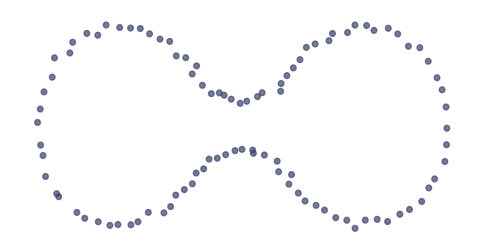

In [116]:
X=E
distance = compute_eps_geodesic_distance(X, 0.3)
'Generate the animation'

fig = plt.figure( figsize=(6,3) )     #define the figure
ax = fig.add_subplot(1, 1, 1)           #define the axis
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-1.2,1.2)

ax.axis('off')
fig.add_axes(ax)


anim = animation.FuncAnimation(fig, animationRips,
                               frames=number_frames,
                               interval=350,
                               blit=False,
                               repeat=False)

' Display the animation in the notebook '

HTML(anim.to_html5_video()) 

In [117]:
HTML(anim.to_html5_video())

In [2]:
#anim.save('animations/filtration_eyeglasses_geodesic.gif',writer='imagemagick',fps=FPS, dpi = DPI)